# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(f"Number of cities in the list: {len(cities)}")

cities[0]

'port-aux-francais'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
#https://api.openweathermap.org/data/2.5/weather?"q=London,uk&APPID=16cdee1800342e6877a8ce8696fa89a6"

url = "https://api.openweathermap.org/data/2.5/weather?q="
url1 = "https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=16cdee1800342e6877a8ce8696fa89a6"

#"https://api.openweathermap.org/data/3.0/weather?"
city1 = "port-aux-francais"
query_url = url + city1 + "&appid=" + weather_api_key


response2 = requests.get(query_url)
data2 = response2.json()

response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&APPID=16cdee1800342e6877a8ce8696fa89a6")
data = response.json()


city_url = url + city1 + "&appid=" + weather_api_key
city_weather = requests.get(city_url).json()

# city_data = []

# try:
#     city = city_weather["name"]
#     city_lat = city_weather["coord"]["lat"]
#     city_lng = city_weather["coord"]["lon"]
#     city_max_temp = city_weather["main"]["temp_max"]
#     city_humidity = city_weather["main"]["humidity"]
#     city_clouds = city_weather["clouds"]
#     city_wind = city_weather["wind"]
#     city_country = city_weather["sys"]["country"]
#     city_date = city_weather["dt"]

#         # Append the City information into city_data list
#     city_data.append({"City": city, 
#                     "Lat": city_lat, 
#                     "Lng": city_lng, 
#                     "Max Temp": city_max_temp,
#                     "Humidity": city_humidity,
#                     "Cloudiness": city_clouds,
#                     "Wind Speed": city_wind,
#                     "Country": city_country,
#                     "Date": city_date})
# except:
#     print("huh")
#     pass

# for city in cities:
#     city_url = url + city + "&appid=" + weather_api_key
#     data = requests.get(city_url).json()
#     print(city_url)


print(json.dumps(city_weather, indent=4, sort_keys=True))
#print(city_data)


{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -49.35,
        "lon": 70.2167
    },
    "dt": 1713742149,
    "id": 1546102,
    "main": {
        "feels_like": 272.69,
        "grnd_level": 1012,
        "humidity": 73,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 278.38,
        "temp_max": 278.38,
        "temp_min": 278.38
    },
    "name": "Port-aux-Fran\u00e7ais",
    "sys": {
        "country": "TF",
        "sunrise": 1713751847,
        "sunset": 1713788644
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 298,
        "gust": 13,
        "speed": 11.4
    }
}


In [33]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Old URL that worked
# url + city + "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | yuzhno-kurilsk
Processing Record 5 of Set 1 | argo
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | lianjiang
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | nkoteng
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | anapa
Processing Record 22 of Set 1 | vilyuysk
Processing Rec

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.28,73,10,12.00,TF,1713744392
1,stanley,54.8680,-1.6985,4.33,89,75,2.06,GB,1713744279
2,waitangi,-43.9535,-176.5597,14.34,82,37,3.13,NZ,1713744392
3,yuzhno-kurilsk,44.0306,145.8556,2.43,97,100,4.11,RU,1713744392
4,argo,37.6333,22.7333,12.19,79,74,2.43,GR,1713744393


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.28,73,10,12.00,TF,1713744392
1,stanley,54.8680,-1.6985,4.33,89,75,2.06,GB,1713744279
2,waitangi,-43.9535,-176.5597,14.34,82,37,3.13,NZ,1713744392
3,yuzhno-kurilsk,44.0306,145.8556,2.43,97,100,4.11,RU,1713744392
4,argo,37.6333,22.7333,12.19,79,74,2.43,GR,1713744393


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

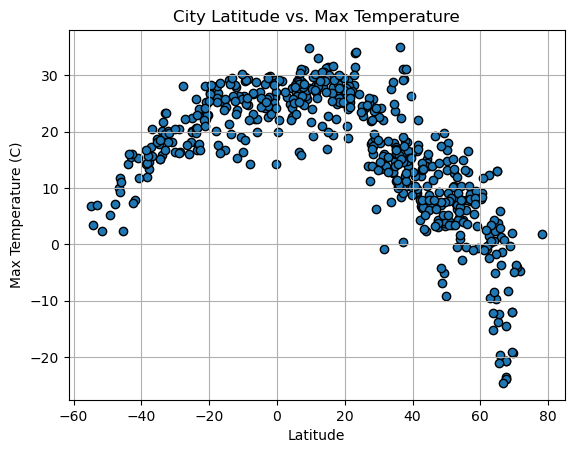

In [40]:
# Build scatter plot for latitude vs. temperature
temp_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

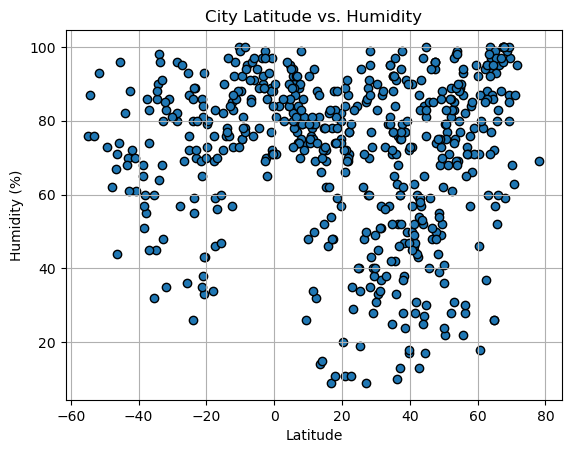

In [43]:
# Build the scatter plots for latitude vs. humidity
hum_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

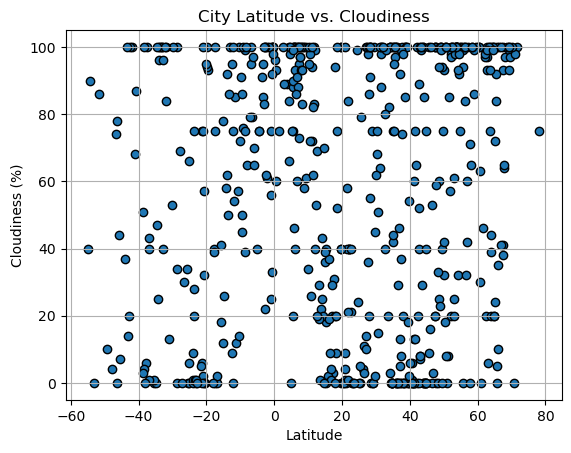

In [44]:
# Build the scatter plots for latitude vs. cloudiness
cloud_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

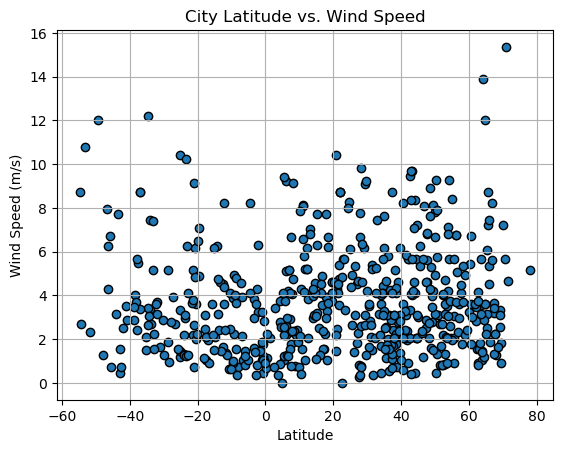

In [45]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidth=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
   
    # Calculate linear regression statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Calculate regression values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot the data points and the regression line
    plt.scatter(x, y)
    plt.plot(x, regress_values, c='red', label=f'Linear Regression Line\n{line_eq}')
    plt.legend()
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,4.33,89,75,2.06,GB,1713744279
3,yuzhno-kurilsk,44.0306,145.8556,2.43,97,100,4.11,RU,1713744392
4,argo,37.6333,22.7333,12.19,79,74,2.43,GR,1713744393
5,anadyr,64.7500,177.4833,-9.72,72,100,12.00,RU,1713744393
6,nar'yan-mar,67.6713,53.0870,-23.83,100,64,2.24,RU,1713744393


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.28,73,10,12.00,TF,1713744392
2,waitangi,-43.9535,-176.5597,14.34,82,37,3.13,NZ,1713744392
11,ushuaia,-54.8000,-68.3000,6.81,76,40,8.75,AR,1713744345
15,ta`u,-14.2336,-169.5144,29.08,76,58,6.28,AS,1713744401
16,adamstown,-25.0660,-130.1015,22.37,72,66,10.43,PN,1713744348


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8487467352961959


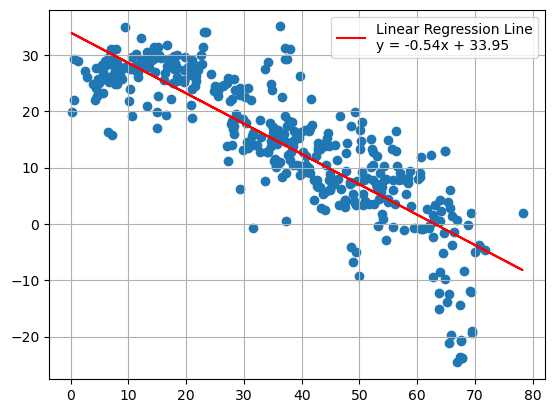

In [61]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.7872269022123333


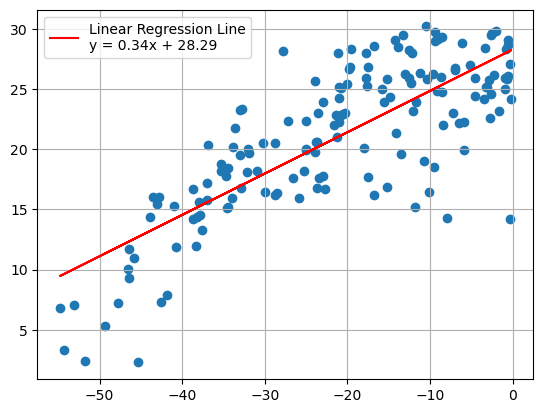

In [62]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05143580632744588


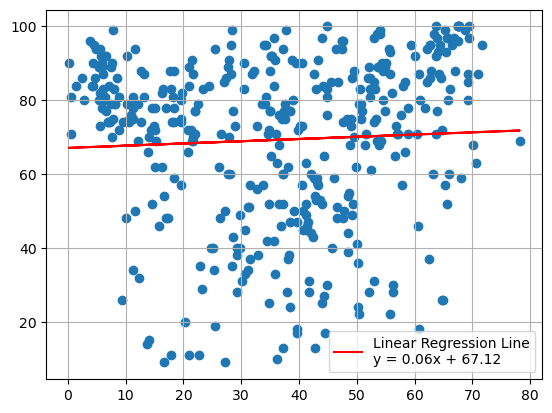

In [63]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: 0.29460429405411337


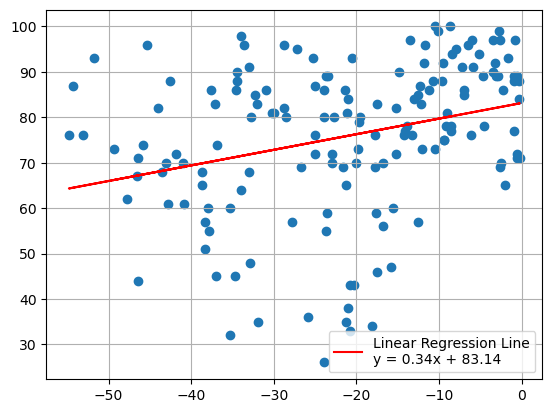

In [64]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.059811533862331415


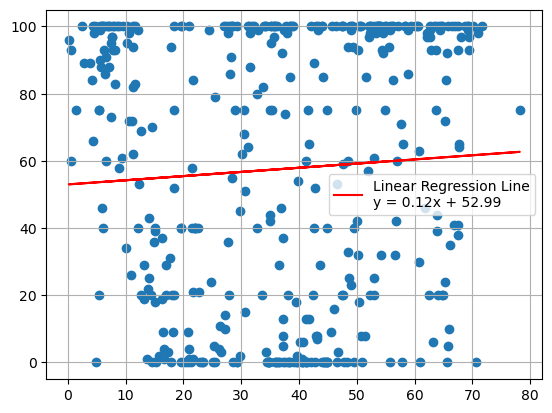

In [70]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.2689283389112898


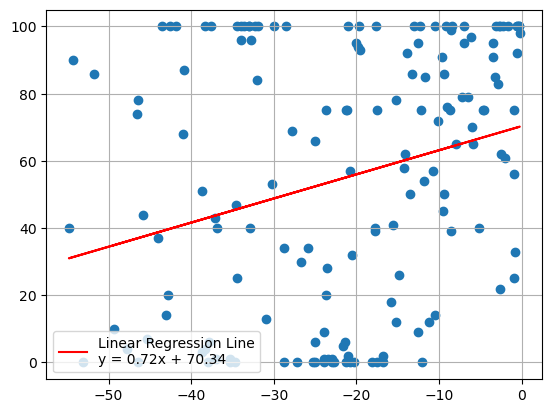

In [65]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.062064465661668


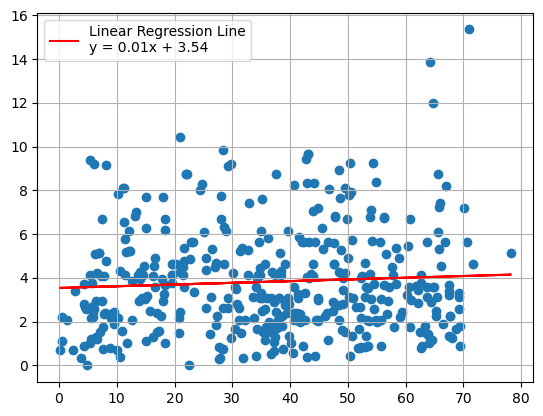

In [69]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.32507007615153216


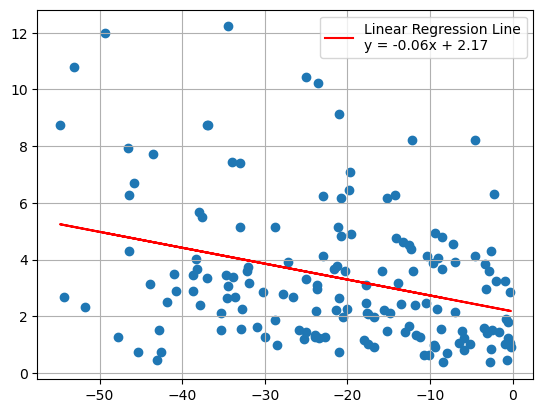

In [67]:
# Southern Hemisphere
lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE